In [1]:
import pandas as pd

In [2]:
# Load the dataset
df_initial= pd.read_csv("heart_disease_uci_cleaned_data.csv",encoding="latin1")

In [3]:
df_initial.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,oxygen level,num,result
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,70,0,True
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,93,2,False
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,94,1,False
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,74,0,True
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,85,0,True


In [4]:
#Checking for missing values
missing_values = df_initial.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
age               0
sex               0
cp                0
trestbps         59
chol             30
fbs              90
restecg           2
thalch           55
exang            55
oldpeak          62
slope           309
ca              611
thal            486
oxygen level      0
num               0
result            0
dtype: int64


In [5]:
#As trestbps is crucial value for prediction we replace it by mean
df_initial['trestbps'] = df_initial['trestbps'].fillna(df_initial['trestbps'].mean())
print("Number of null values in 'trestbps' column after replacement:", df_initial['trestbps'].isnull().sum())

Number of null values in 'trestbps' column after replacement: 0


In [6]:
#As chol is crucial value for prediction we replace null values by mean
df_initial['chol'] = df_initial['chol'].fillna(df_initial['chol'].mean())
print("Number of null values in 'chol' column after replacement:", df_initial['chol'].isnull().sum())

Number of null values in 'chol' column after replacement: 0


In [7]:
#As chol is thalch(max heart rate acheived) value for prediction we replace null values by mean
df_initial['thalch'] = df_initial['thalch'].fillna(df_initial['thalch'].mean())
print("Number of null values in 'thalch' column after replacement:", df_initial['thalch'].isnull().sum())

Number of null values in 'thalch' column after replacement: 0


In [8]:
#Checking for missing values

missing_values = df_initial.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs              90
restecg           2
thalch            0
exang            55
oldpeak          62
slope           309
ca              611
thal            486
oxygen level      0
num               0
result            0
dtype: int64


In [9]:
df_copy=df_initial.copy()

In [10]:
# List of columns to remove
columns_to_remove = ['chol','fbs', 'restecg', 'exang','oldpeak','slope','ca','thal','oxygen level','cp']

# Drop the unwanted columns from the dataframe
df_cleaned = df_initial.drop(columns=columns_to_remove,inplace=True)

In [11]:
df_initial.head()

,age,sex,trestbps,thalch,num,result
0,63,Male,145.0,150.0,0,True
1,67,Male,160.0,108.0,2,False
2,67,Male,120.0,129.0,1,False
3,37,Male,130.0,187.0,0,True
4,41,Female,130.0,172.0,0,True


In [12]:
df2=df_initial.copy()
df2.head()

,age,sex,trestbps,thalch,num,result
0,63,Male,145.0,150.0,0,True
1,67,Male,160.0,108.0,2,False
2,67,Male,120.0,129.0,1,False
3,37,Male,130.0,187.0,0,True
4,41,Female,130.0,172.0,0,True


In [13]:
import matplotlib.pyplot as plt

In [14]:
# Calculate the highest and lowest age
max_age = df2['age'].max()
min_age = df2['age'].min()

# Define the age range
age_range = (min_age // 10 * 10, (max_age // 10 + 1) * 10)

In [15]:
# Define age groups
age_groups = pd.cut(df2['age'], bins=range(age_range[0], age_range[1] + 1, 10), labels=[f'{i}-{i+9}' for i in range(age_range[0], age_range[1], 10)])

# Add age groups to the DataFrame
df2['age_group'] = age_groups

# Filter the dataframe to include only rows where 'num' is high (greater than 0)
high_num_df = df2[df2['num'] > 0]

# Count the frequency of diseases for each age group
age_group_counts = high_num_df['age_group'].value_counts().sort_index()

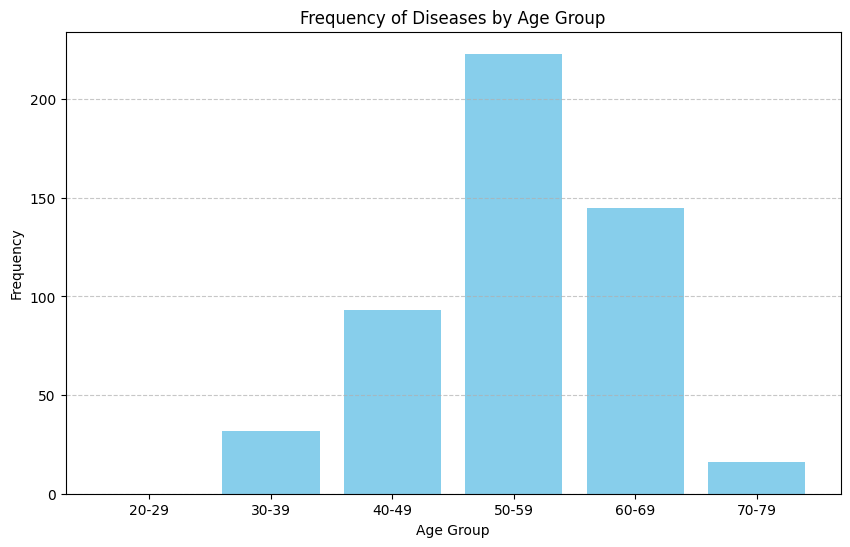

In [16]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.title('Frequency of Diseases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Round off the values in the 'chol' column and convert to integers
df2['trestbps'] = df2['trestbps'].round().astype(int)

# Calculate the highest and lowest cholesterol levels
max_trestbps = df2['trestbps'].max()
min_trestbps = df2['trestbps'].min()

# Define the cholesterol range
trestbps_range = (min_trestbps // 50 * 50, (max_trestbps // 50 + 1) * 50)

# Define cholesterol groups
trestbps_groups = pd.cut(df2['trestbps'], bins=range(trestbps_range[0], trestbps_range[1] + 1, 50), labels=[f'{i}-{i+49}' for i in range(trestbps_range[0], trestbps_range[1], 50)])

# Add cholesterol groups to the DataFrame
df2['trestbps_group'] = trestbps_groups

# Filter the dataframe to include only rows where 'num' is high (greater than 0)
high_num_df = df2[df2['num'] > 0]

# Count the frequency of diseases for each cholesterol group
trestbps_group_counts = high_num_df['trestbps_group'].value_counts().sort_index()

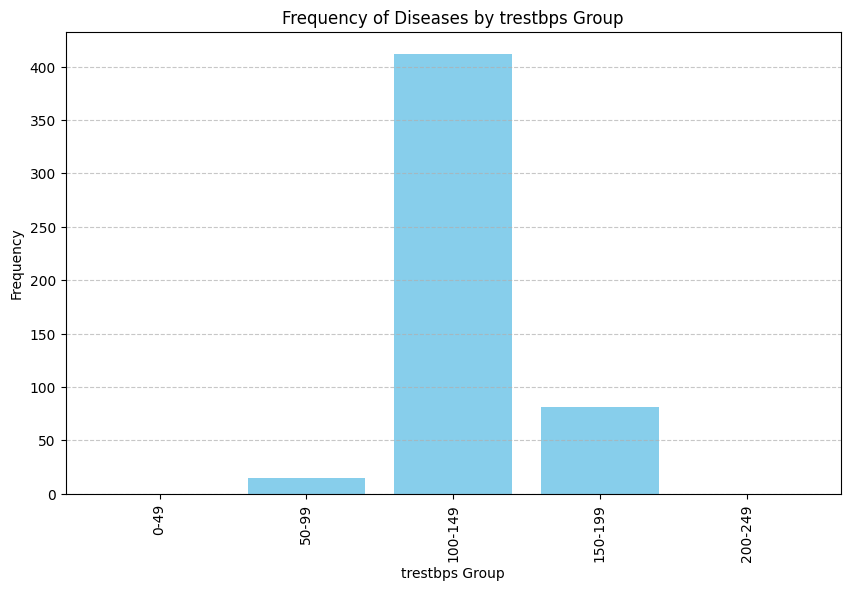

In [18]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(trestbps_group_counts.index.astype(str), trestbps_group_counts.values, color='skyblue')
plt.title('Frequency of Diseases by trestbps Group')
plt.xlabel('trestbps Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
#Checking for missing values

missing_values = df_initial.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
age         0
sex         0
trestbps    0
thalch      0
num         0
result      0
dtype: int64


In [20]:
#checking for outliers
import numpy as np

We define a function detect_outliers_zscore that calculates the Z-scores for each data point in a column.
We apply this function to all numeric columns in the DataFrame using apply.
The threshold parameter in detect_outliers_zscore determines how many standard deviations away from the mean a value must be to be considered an outlier. By default, it is set to 3, but you can adjust it as needed.
Finally, we print the rows in the DataFrame that contain outliers in any of the numeric columns.

In [21]:
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold
# Apply the function to all numeric columns in the DataFrame
numeric_columns = df_initial.select_dtypes(include=np.number)
outliers = numeric_columns.apply(detect_outliers_zscore)
# Print rows with outliers
print("Rows with outliers:")
print(df_initial[outliers.any(axis=1)])

Rows with outliers:
     age     sex  trestbps  thalch  num  result
126   56  Female     200.0   133.0    3   False
188   54    Male     192.0   195.0    1   False
338   39    Male     190.0   106.0    0    True
548   54    Male     200.0   142.0    1   False
631   51    Male     140.0    60.0    2   False
680   61    Male     200.0    70.0    3   False
701   64  Female     200.0   140.0    3   False
753   55    Male       0.0   155.0    3   False
896   61    Male     190.0   150.0    4   False


In [22]:
# Define a function to replace outliers with the mean
def replace_outliers_with_mean(data, threshold=3):
    # Calculate Z-scores
    z_scores = np.abs((data - data.mean()) / data.std())
    # Replace outliers with NaN
    data[z_scores > threshold] = np.nan
    # Replace NaN values with mean
    data.fillna(data.mean(), inplace=True)

# Apply the function to all numeric columns in the DataFrame
numeric_columns = df_initial.select_dtypes(include=np.number)
replace_outliers_with_mean(numeric_columns)

# Print DataFrame after replacing outliers with mean
print(df_initial)

     age     sex    trestbps      thalch  num  result
0     63    Male  145.000000  150.000000    0    True
1     67    Male  160.000000  108.000000    2   False
2     67    Male  120.000000  129.000000    1   False
3     37    Male  130.000000  187.000000    0    True
4     41  Female  130.000000  172.000000    0    True
..   ...     ...         ...         ...  ...     ...
915   54  Female  127.000000  154.000000    1   False
916   62    Male  132.132404  137.545665    0    True
917   55    Male  122.000000  100.000000    2   False
918   58    Male  132.132404  137.545665    0    True
919   62    Male  120.000000   93.000000    1   False

[920 rows x 6 columns]


In [23]:
df_initial.drop(columns=['num'], inplace=True)

In [24]:
df_initial.head()

,age,sex,trestbps,thalch,result
0,63,Male,145.0,150.0,True
1,67,Male,160.0,108.0,False
2,67,Male,120.0,129.0,False
3,37,Male,130.0,187.0,True
4,41,Female,130.0,172.0,True


In [25]:
data = pd.get_dummies(df_initial, columns=["sex"], dtype=int)

In [26]:
data.head()

,age,trestbps,thalch,result,sex_Female,sex_Male
0,63,145.0,150.0,True,0,1
1,67,160.0,108.0,False,0,1
2,67,120.0,129.0,False,0,1
3,37,130.0,187.0,True,0,1
4,41,130.0,172.0,True,1,0


In [27]:
# Split the data into features and target variables
X = data.drop(columns=['result'])
y_alert = data['result']

In [28]:
X.head()

,age,trestbps,thalch,sex_Female,sex_Male
0,63,145.0,150.0,0,1
1,67,160.0,108.0,0,1
2,67,120.0,129.0,0,1
3,37,130.0,187.0,0,1
4,41,130.0,172.0,1,0


In [29]:
y_alert.head()

0     True
1    False
2    False
3     True
4     True
Name: result, dtype: bool

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [31]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_alert_train, y_alert_test = train_test_split(X_scaled, y_alert, test_size=0.2, random_state=42)

In [33]:
# Train Logistic Regression model for 'Alert' prediction
logreg_alert = LogisticRegression()
logreg_alert.fit(X_train, y_alert_train)
y_alert_pred_logreg = logreg_alert.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
# Evaluate Logistic Regression models
print("Logistic Regression Model (Alert Prediction):")
print(classification_report(y_alert_test, y_alert_pred_logreg))

Logistic Regression Model (Alert Prediction):
              precision    recall  f1-score   support

       False       0.76      0.72      0.74       109
        True       0.62      0.67      0.64        75

    accuracy                           0.70       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.70      0.70       184



In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Split the data into training and testing sets
x_train, x_test, Y_alert_train, Y_alert_test = train_test_split(X, y_alert, test_size=0.2, random_state=42)

In [38]:
# Choose a machine learning algorithm
alert_classifier = RandomForestClassifier()

In [39]:
# Train the model on the training data
alert_classifier.fit(x_train, Y_alert_train)

RandomForestClassifier()

In [40]:
# Evaluate the model's performance on the testing data
alert_predictions = alert_classifier.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
alert_accuracy = accuracy_score(Y_alert_test, alert_predictions)

In [43]:
print("Alert Classifier Accuracy:", alert_accuracy)

Alert Classifier Accuracy: 0.7119565217391305


In [44]:
# You can also print classification reports for detailed performance metrics
print("\nRandom Forest Classifier (Alert Classifier Report):")
print(classification_report(Y_alert_test, alert_predictions))


Random Forest Classifier (Alert Classifier Report):
              precision    recall  f1-score   support

       False       0.79      0.71      0.74       109
        True       0.63      0.72      0.67        75

    accuracy                           0.71       184
   macro avg       0.71      0.71      0.71       184
weighted avg       0.72      0.71      0.71       184



In [45]:
import pickle

In [46]:
with open("smartttdatanor_alert_model.pkl", "wb") as f:
    pickle.dump(alert_classifier, f)